In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [11]:
hanhwa = pd.read_csv('./hanhwa190102.csv')

In [3]:
hanhwa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 7 columns):
date      5669 non-null object
close     5669 non-null int64
diff      5669 non-null int64
open      5669 non-null int64
high      5669 non-null int64
low       5669 non-null int64
volume    5669 non-null int64
dtypes: int64(6), object(1)
memory usage: 310.1+ KB


In [12]:
hanhwa.head()

,date,close,diff,open,high,low,volume
0,1996-06-25,9360,0,9400,9500,9350,12310
1,1996-06-26,9100,260,9400,9400,9100,10590
2,1996-06-27,9200,100,9000,9300,8800,25450
3,1996-06-28,9200,0,9200,9400,9200,15200
4,1996-06-29,9110,90,9200,9200,9000,8220


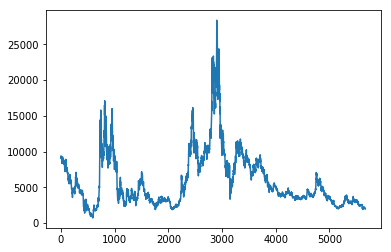

In [13]:
# 시각화
plt.plot(hanhwa['close'])

# ddf = df.T
# ddf.head()
# ddf.columns = ddf.iloc[0]
# ddf1 = ddf[1:]
# ddf1
# df = df.set_index('date')

{'boxes': [<matplotlib.lines.Line2D at 0x7f6c7bb3d9e8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6c7bb431d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6c7bb43ba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6c7bb43860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6c7bb3db38>,
  <matplotlib.lines.Line2D at 0x7f6c7bb3de48>]}

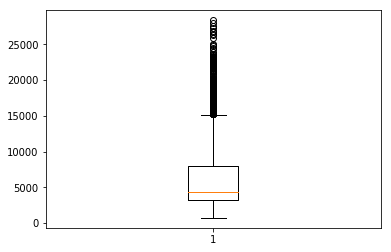

In [14]:
plt.boxplot(hanhwa['close'])

In [ ]:
hanhwa1 = hanhwa['close']
hanhwa1.plot()
plt.show()

In [ ]:
plt.hist(hanhwa['close'], bins=30)

In [19]:
hanhwa.head()

,date,close,diff,open,high,low,volume
0,1996-06-25,9360,0,9400,9500,9350,12310
1,1996-06-26,9100,260,9400,9400,9100,10590
2,1996-06-27,9200,100,9000,9300,8800,25450
3,1996-06-28,9200,0,9200,9400,9200,15200
4,1996-06-29,9110,90,9200,9200,9000,8220


In [23]:
hanhwa['date'] = pd.to_datetime(hanhwa['date'])

In [27]:
hanhwa.tail(5)

,date,close,diff,open,high,low,volume
5664,2018-12-24,2055,15,2040,2060,2000,141300
5665,2018-12-26,2010,45,2025,2040,1995,333188
5666,2018-12-27,2010,0,2060,2080,2010,150783
5667,2018-12-28,2035,25,2020,2060,2015,210069
5668,2019-01-02,2020,15,2055,2065,2005,146639


## Fbprophet 적용

In [38]:
dataset = hanhwa.iloc[:,:2]

In [53]:
dataset.head(5)

,ds,close
0,1996-06-25,9360
1,1996-06-26,9100
2,1996-06-27,9200
3,1996-06-28,9200
4,1996-06-29,9110


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 2 columns):
ds       5669 non-null datetime64[ns]
close    5669 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 88.7 KB


In [48]:
dataset.rename(columns={'date':"ds"}, inplace=True)

In [54]:
dataset.rename(columns={'close':"y"}, inplace=True)

In [55]:
m = Prophet()

In [56]:
m.fit(dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future = m.make_future_dataframe(periods=30)
future.tail()


,ds
5694,2019-01-28
5695,2019-01-29
5696,2019-01-30
5697,2019-01-31
5698,2019-02-01


In [59]:
forecast = m.predict(future)

,ds,yhat,yhat_lower,yhat_upper
5689,2019-01-23,2829.253732,957.346620,4693.660350
5690,2019-01-24,2825.144404,930.572367,4796.800156
5691,2019-01-25,2752.762680,721.591294,4727.367867
5692,2019-01-26,2311.943435,471.298159,4142.009162
5693,2019-01-27,2785.275807,906.298384,4747.044964
5694,2019-01-28,2670.707477,787.007541,4614.307810
5695,2019-01-29,2618.237425,596.301508,4563.760334
5696,2019-01-30,2593.522852,729.501193,4549.179227
5697,2019-01-31,2591.930192,684.090620,4436.015840
5698,2019-02-01,2525.071563,503.699313,4464.702717


In [60]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
5669,2019-01-03,3042.001041,1212.675639,5078.410560
5670,2019-01-04,3011.212805,1012.188812,4944.994260
5671,2019-01-05,2612.122270,728.305518,4390.124342
5672,2019-01-06,3126.609333,1298.950376,5026.182174
5673,2019-01-07,3051.887224,1177.112436,4818.973544
5674,2019-01-08,3037.213970,1258.291839,4923.886190
5675,2019-01-09,3047.518525,1045.193289,5007.786217
5676,2019-01-10,3077.470963,1113.650235,5080.967653
5677,2019-01-11,3038.037564,1127.238119,4909.039586
5678,2019-01-12,2628.375295,695.646213,4402.218060


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 2 columns):
ds    5669 non-null datetime64[ns]
y     5669 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 88.7 KB


In [62]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 19 columns):
ds                            5699 non-null datetime64[ns]
trend                         5699 non-null float64
trend_lower                   5699 non-null float64
trend_upper                   5699 non-null float64
yhat_lower                    5699 non-null float64
yhat_upper                    5699 non-null float64
additive_terms                5699 non-null float64
additive_terms_lower          5699 non-null float64
additive_terms_upper          5699 non-null float64
multiplicative_terms          5699 non-null float64
multiplicative_terms_lower    5699 non-null float64
multiplicative_terms_upper    5699 non-null float64
weekly                        5699 non-null float64
weekly_lower                  5699 non-null float64
weekly_upper                  5699 non-null float64
yearly                        5699 non-null float64
yearly_lower                  5699 non-null float64
ye

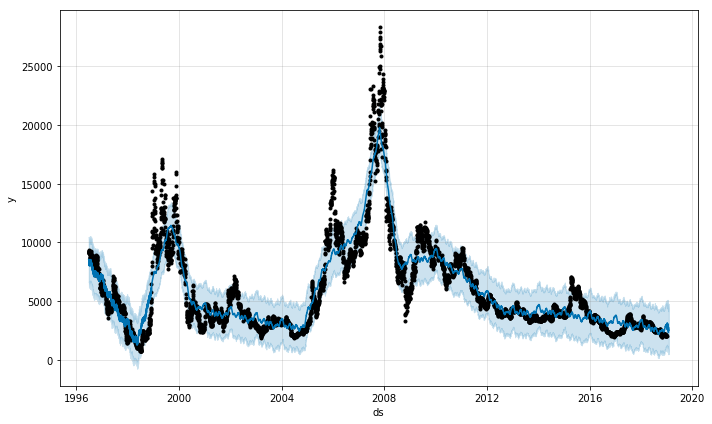

In [64]:
fig1 = m.plot(forecast)

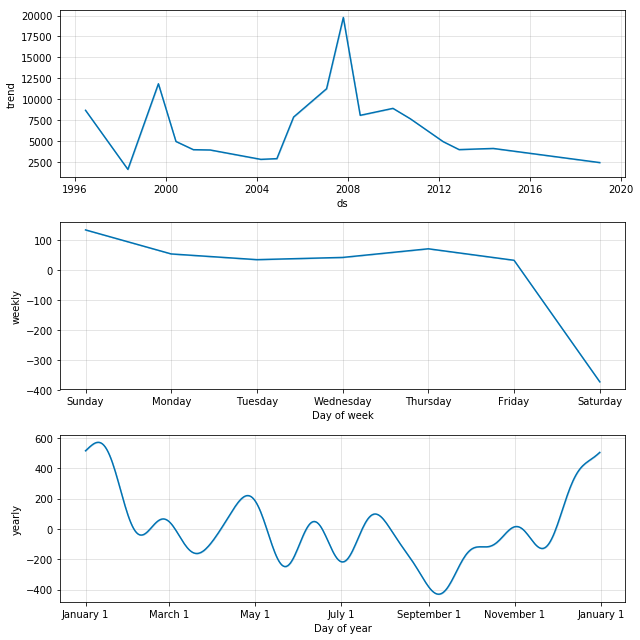

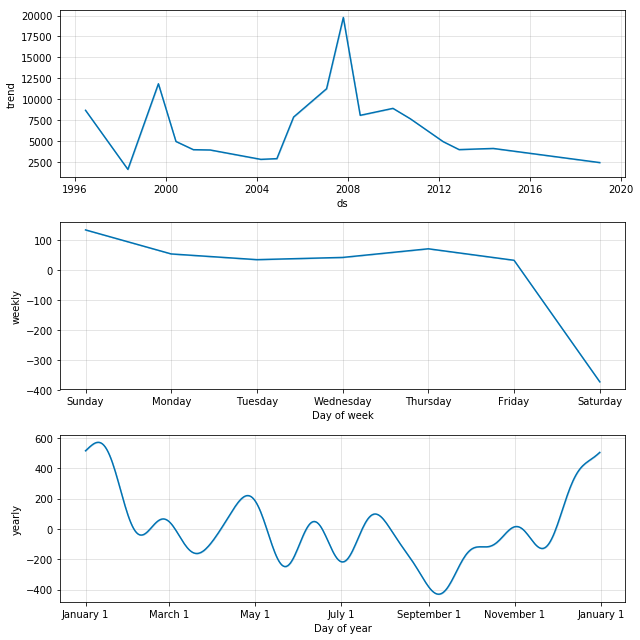

In [67]:
m.plot_components(forecast)

# Anima 도전

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(hanhwa1, method='ymw')
plot_pacf(hanhwa1, method='ymw')
plt.show()


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(hanhwa1, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

In [ ]:
model_fit.plot_predict()

In [ ]:
fore = model_fit.forecast(steps=1)
print(fore)